# Exploratory analysis of the Lima Andina datasets

### Load a CSV file into a dataframe using Pandas and output a sample of rows  

In [22]:
import pandas as pd

file = "datos/lima-andina-articulos-con-texto.csv"
df = pd.read_csv(file)
df.sample(2)

,Id,Sección de El Comercio,El Comercio Section,Página,Number,Fecha,(PDF),Edición,Palabras Clave,Source Id,Id_Asoc,Asociación,Titulo Original,Texto,Unnamed: 14,Seccion de El Comercio
2496,2497,Vida Obrera,7,10,41666,1925/4/18,67,Tarde,"Citación, asamblea general",1.0,29,Sociedad Hijos de Orcotuna,CITACIONES,CITACIONES - La Sociedad Hijos de Orcotuna ses...,NaN,NaN
4800,4801,Sociedades é Instituciones,4,7,45220,1930/9/21,4,Tarde,"Junta general, citación",1.0,247,Centro Unión Hijos de Carhuaz,"=TRIM(LEFT(N4802,FIND("" -"",N4802)))",CENTRO UNION HIJOS DE CARHUAZ - Esta instituci...,NaN,NaN


### Check if there are empty cells for each column
- Let's check for empty cells and calculate the summ of empty values for each column. 
- There is an empty cell in the "Texto" column. 
- Columns "Unnamed" and "Seccion de El" are comments, we are going to delete them.

In [23]:
df.isna().sum()

Id                           0
Sección de El Comercio       0
El Comercio Section          0
Página                       0
Number                       0
Fecha                        0
(PDF)                        0
Edición                      0
Palabras Clave               0
Source Id                    2
Id_Asoc                      0
Asociación                   0
Titulo Original              0
Texto                        1
Unnamed: 14               6560
Seccion de El Comercio    6561
dtype: int64

### We will fill the empty cell with the 'unknown' token and delete two columns
- The unkmown token is necessary for the preprocessing of the textual data in the Machine Learning pipelines
- Eventually, if this was a data entry mistake, the empty cell willl be filled with the corresponding text.
- We will also erase two columns

In [24]:
df.fillna({'Texto': 'unknown'}, inplace=True)
df.drop(columns=['Seccion de El Comercio'])
df.drop(columns=['Unnamed: 14'])

,Id,Sección de El Comercio,El Comercio Section,Página,Number,Fecha,(PDF),Edición,Palabras Clave,Source Id,Id_Asoc,Asociación,Titulo Original,Texto,Seccion de El Comercio
0,1,\N,\N,3,30427,1906/8/2,1,Mañana,"Junta directiva, nombre, sociedad",1.0,7,Sociedad Hijos de Ancash,SOCIEDAD HIJOS DE ANCASH,SOCIEDAD HIJOS DE ANCASH - Anteanoche tuvo lug...,Nombre
1,2,Sociedades é Instituciones,4,3,30446,1906/8/12,2,\N,"Citación, asamblea general, reglamento",1.0,7,Sociedad Hijos de Ancash,SOCIEDAD HIJOS DE ANCASH,SOCIEDAD HIJOS DE ANCASH - A las dos de la tar...,\N
2,3,Sociedades é Instituciones,4,2,30506,1906/9/15,4,Tarde,"Citación, asamblea general",1.0,7,Sociedad Hijos de Ancash,SOCIEDAD HIJOS DE ANCASH,SOCIEDAD HIJOS DE ANCASH - El día de mañana do...,Avisos de Preferencia
3,4,Sociedades é Instituciones,4,4,30558,1906/10/14,5,\N,"Citación, asamblea general",1.0,7,Sociedad Hijos de Ancash,SOCIEDAD HIJOS DE ANCASH,SOCIEDAD HIJOS DE ANCASH - Hoy a las 3 de la t...,Intereses Generales
4,5,Sociedades é Instituciones,4,6,30584,1906/10/28,6,\N,"Citación, asamblea general",1.0,7,Sociedad Hijos de Ancash,HIJOS DE ANCASH,HIJOS DE ANCASH - Mañana a las dos de la tarde...,Sociedades
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,6571,Vida Obrera,7,5,47404,1933/12/24,60,\N,"Citación, junta general",1.0,41,Centro Unión Provincia Cangallo,"=TRIM(LEFT(N6572,FIND("" -"",N6572)))",CENTRO UNION PROVINCIAL CANGALLO - Cita a sus ...,NaN
6571,6572,Vida Obrera,7,4,47409,1933/12/27,61,Tarde,"Acuerdos, celebración, aniversario, citación, ...",1.0,408,Centro Unión Hijos de Pairaca,"=TRIM(LEFT(N6573,FIND("" -"",N6573)))","CENTRO UNION HIJOS DE PAIRACA - Lima, 26 de di...",NaN
6572,6573,Vida Obrera,7,3,47411,1933/12/28,62,Tarde,"Citación, junta general",1.0,69,Sociedad Fraternal Hijos de Huandoval,"=TRIM(LEFT(N6574,FIND("" -"",N6574)))",SOCIEDAD FRATERNAL HIJOS DE HUANDOVAL - Cita a...,NaN
6573,6574,Citaciones,9,6,47412,1933/12/29,63,Mañana,"Citación, junta general",1.0,32,Sociedad Hijos de Tauca,"=TRIM(LEFT(N6575,FIND("" -"",N6575)))",SOCIEDAD HIJOS DE TAUCA - Cita a todos los hij...,NaN


### Let's measure the character lenghth of the "Texto" column, store the measurement in a new column and output some statistics.
- There are 6575 newspaper ads in this dataset.
- The mean lenghth measured in characters is 312.16.
- The shortest announcement consists of 6 characters, which corresponds to the 'unknown' token we just have added, and the longest has 6172 characters.

In [25]:
df['extension-texto'] = df['Texto'].str.len()

df['extension-texto'].describe().T

count    6575.000000
mean      312.163802
std       423.004829
min         7.000000
25%       101.000000
50%       181.000000
75%       305.000000
max      6172.000000
Name: extension-texto, dtype: float64

### It can be useful to describe the column "Texto" in terms of unique values and the top value frequency
- We can observe that count and unique values are diferent. This can be due to the fact that many of these anouncements are short, for example when simply announcing a meeting in a place, and so these sometimes were simply repeated verbatim.
- Nevertheless, there may be repetitions that are due to data entry mistakes. 

In [26]:
df['Texto'].describe(include='O').T

count                                                  6575
unique                                                 6338
top       FEDERACION DEPARTAMENTAL HUANUCO - Esta instit...
freq                                                      7
Name: Texto, dtype: object

- We can do a more specific analysis and include value counts for the first 20 most frequent values.
- We can especulate that the very short, generic texts calling for a meeting may be real repetitions in the corpus, while the repetitions of longer, more specific texts, may be due to data entry mistakes. 

In [27]:
df['Texto'].value_counts().head(20)

Texto
FEDERACION DEPARTAMENTAL HUANUCO - Esta institución compuesta de los centros Domaino, Pachitea, Ambo, Huamalíes, Social Huánuco y Juventud Huánuco, celebró sesión de asamblea general, aprobando en ella sus estatutos, y debiendo instalarse a tenor de los mismos, el Comité Federal respectivo para el efecto de revisar las credenciales respectivas de los diez delegados que cada centro enviará con tal fin se procedió a la elección de un presidente provisorio, recayendo la designación en la persona de don Vicente F. Arteta, quien pasó a ocupar la Presidencia de la asamblea y procedió a la proclamación de los estatutos sancionados, citándose para la instalación del Comité Federal el seis de julio a las ocho y media de la noche.    7
HIJOS DE MISTI - Sesionará hoy, a las 8 y 30 p.m. en su local.                                                                                                                                                                                                    

- Let's look deeper and check how do the rows that correspond to the top frequency value look like.
- What we can observe is that these 7 rows correspond to 7 different organizations that were acting togeter and publishing the same announcent at the same time, which is interesting in itself for analyzing the data and modelling patterns in the data.
- The text of the ad tells us that these seven separate organizations ("centros") have come together to form a federation ("federación") and informs that a general meeting took place in which the statutes of the federated organization were approved:
> FEDERACION DEPARTAMENTAL HUANUCO - Esta institución compuesta de los centros Domaino, Pachitea, Ambo, Huamalíes, Social Huánuco y Juventud Huánuco, celebró sesión de asamblea general, aprobando en ella sus estatutos, y debiendo instalarse a tenor de los mismos, el Comité Federal respectivo para el efecto de revisar las credenciales respectivas de los diez delegados que cada centro enviará con tal fin se procedió a la elección de un presidente provisorio, recayendo la designación en la persona de don Vicente F. Arteta, quien pasó a ocupar la Presidencia de la asamblea y procedió a la proclamación de los estatutos sancionados, citándose para la instalación del Comité Federal el seis de julio a las ocho y media de la noche.
- This probably is a common pattern and the repetitions of unique values in the textual data may point to similar cases.

In [86]:
df[df['Texto'].str.contains('FEDERACION DEPARTAMENTAL HUANUCO')]

,Id,Sección de El Comercio,El Comercio Section,Página,Number,Fecha,(PDF),Edición,Palabras Clave,Source Id,Id_Asoc,Asociación,Titulo Original,Texto,Unnamed: 14,Seccion de El Comercio,extension-texto
4557,4558,Vida Obrera,7,4,44416,1929/7/5,2,Tarde,"Federación departamental Huánuco, compuesta, C...",1.0,55,Centro Juventud Huánuco,"=TRIM(LEFT(N4559,FIND("" -"",N4559)))",FEDERACION DEPARTAMENTAL HUANUCO - Esta instit...,NaN,NaN,730
4558,4559,Vida Obrera,7,4,44416,1929/7/5,2,Tarde,"Federación departamental Huánuco, compuesta, C...",1.0,211,Centro Social Huánuco,"=TRIM(LEFT(N4560,FIND("" -"",N4560)))",FEDERACION DEPARTAMENTAL HUANUCO - Esta instit...,NaN,NaN,730
4559,4560,Vida Obrera,7,4,44416,1929/7/5,2,Tarde,"Federación departamental Huánuco, compuesta, C...",1.0,216,Centro Unión Domaino,"=TRIM(LEFT(N4561,FIND("" -"",N4561)))",FEDERACION DEPARTAMENTAL HUANUCO - Esta instit...,NaN,NaN,730
4560,4561,Vida Obrera,7,4,44416,1929/7/5,2,Tarde,"Federación departamental Huánuco, compuesta, C...",1.0,292,Centro Pachitea,"=TRIM(LEFT(N4562,FIND("" -"",N4562)))",FEDERACION DEPARTAMENTAL HUANUCO - Esta instit...,NaN,NaN,730
4561,4562,Vida Obrera,7,4,44416,1929/7/5,2,Tarde,"Federación departamental Huánuco, compuesta, C...",1.0,329,Centro Social de Auxilios Mutuos Huamalíes,"=TRIM(LEFT(N4563,FIND("" -"",N4563)))",FEDERACION DEPARTAMENTAL HUANUCO - Esta instit...,NaN,NaN,730
4562,4563,Vida Obrera,7,4,44416,1929/7/5,2,Tarde,"Federación departamental Huánuco, compuesta, C...",1.0,337,Centro Cultural Ambo,"=TRIM(LEFT(N4564,FIND("" -"",N4564)))",FEDERACION DEPARTAMENTAL HUANUCO - Esta instit...,NaN,NaN,730
4563,4564,Vida Obrera,7,4,44416,1929/7/5,2,Tarde,"Institución compuesta, Centro Domaino, Centro ...",1.0,349,Federación Departamental de Huánuco,"=TRIM(LEFT(N4565,FIND("" -"",N4565)))",FEDERACION DEPARTAMENTAL HUANUCO - Esta instit...,NaN,NaN,730


- What about the repeated values with short texts calling to meetings? Let's check 
> "HIJOS DE MISTI - Sesionará hoy, a las 8 y 30 p.m. en su local."
- We can observe that in this case the repeated values are due to a single organization publishing the exact same ad in different occasions.
- So, these repetitions are legitimate since are different events.
- These cases are actually contained in the Lima Andina data model and there is a dataset that tracks down these cases of fusion or fission (and other possibilities) of organizations.  

In [28]:
df[df['Texto'].str.contains('HIJOS DE MISTI - Sesionará hoy, a las 8 y 30 p.m. en su local.')]

,Id,Sección de El Comercio,El Comercio Section,Página,Number,Fecha,(PDF),Edición,Palabras Clave,Source Id,Id_Asoc,Asociación,Titulo Original,Texto,Unnamed: 14,Seccion de El Comercio,extension-texto
2636,2637,Vida Obrera,7,3,41785,1925/6/24,41,Tarde,"Citación, asamblea general",1.0,161,Sociedad Humanitaria Hijos del Misti,HIJOS DE MISTI,"HIJOS DE MISTI - Sesionará hoy, a las 8 y 30 p...",NaN,NaN,62
3137,3138,Vida Obrera,7,2,42319,1926/4/22,45,Tarde,"Citación, asamblea general",1.0,161,Sociedad Humanitaria Hijos del Misti,HIJOS DE MISTI,"HIJOS DE MISTI - Sesionará hoy, a las 8 y 30 p...",NaN,NaN,62
3192,3193,Vida Obrera,7,10,42369,1926/5/20,71,Tarde,"Citación, asamblea general",1.0,161,Sociedad Humanitaria Hijos del Misti,HIJOS DE MISTI,"HIJOS DE MISTI - Sesionará hoy, a las 8 y 30 p...",NaN,NaN,62
3254,3255,Vida Obrera,7,11,42445,1926/7/1,19,Tarde,"Citación, asamblea general",1.0,161,Sociedad Humanitaria Hijos del Misti,HIJOS DE MISTI,"HIJOS DE MISTI - Sesionará hoy, a las 8 y 30 p...",NaN,NaN,62
3273,3274,Vida Obrera,7,13,42458,1926/7/8,27,Tarde,"Citación, asamblea general",1.0,161,Sociedad Humanitaria Hijos del Misti,HIJOS DE MISTI,"HIJOS DE MISTI - Sesionará hoy, a las 8 y 30 p...",NaN,NaN,62


### Names of organizations containing the same word
In this dataset there are several organizations that represents the same region or cultural area. It may be useful to observe one case: "Aymaraes"

In [29]:
df[df['Asociación'].str.contains('Aymaraes')]['Asociación'].value_counts()

Asociación
Sociedad Progreso de Aymaraes                          63
Centro Social Hijos de Aymaraes de Protección Mutua    16
Centro Progreso Aymaraes                               14
Centro Cultural Hijos de Aymaraes                       5
Name: count, dtype: int64

<AxesSubplot: >

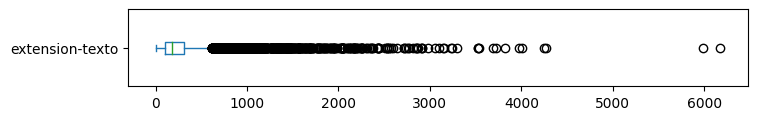

In [88]:
df['extension-texto'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot: ylabel='Frequency'>

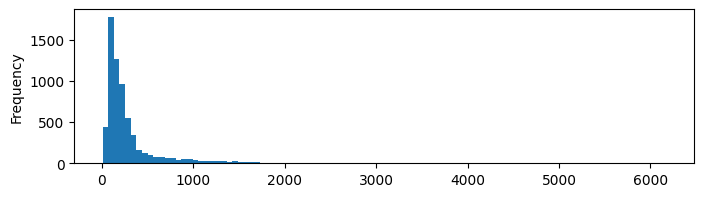

In [89]:
df['extension-texto'].plot(kind='hist', bins=100, figsize=(8,2))

<Figure size 800x200 with 0 Axes>

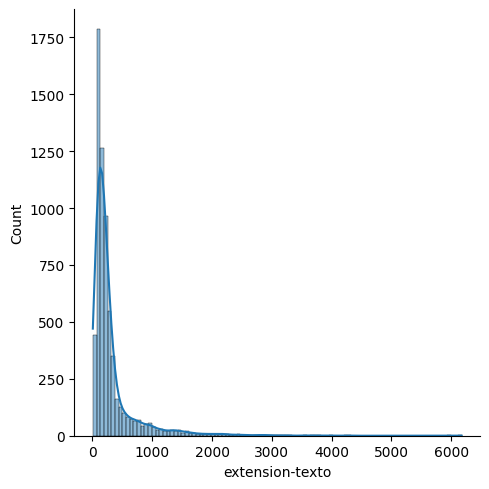

In [90]:
# seaborn plot with gaussian kernel density estimate
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 2))
sns.displot(df['extension-texto'], bins=100, kde=True);

<AxesSubplot: title={'center': 'Número de artículos'}, xlabel='Fecha'>

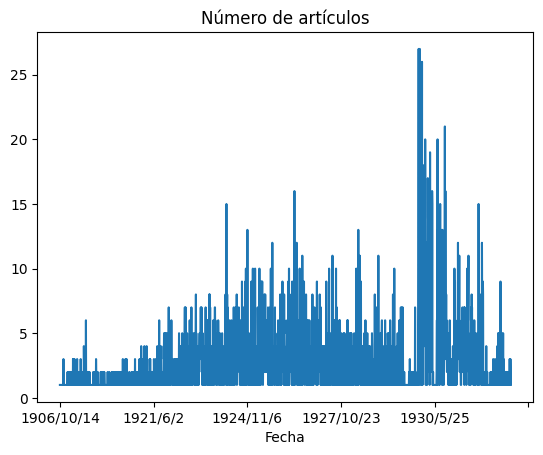

In [91]:
import matplotlib

df.groupby('Fecha').size().plot(title="Número de artículos")

In [77]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [98]:
df['Año'] = pd.DatetimeIndex(df['Fecha']).year

<AxesSubplot: title={'center': 'Número de artículos'}, xlabel='Fecha'>

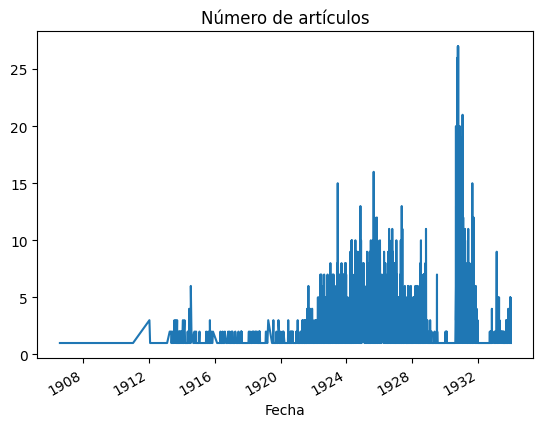

In [78]:
import matplotlib

df.groupby('Fecha').size().plot(title="Número de artículos")

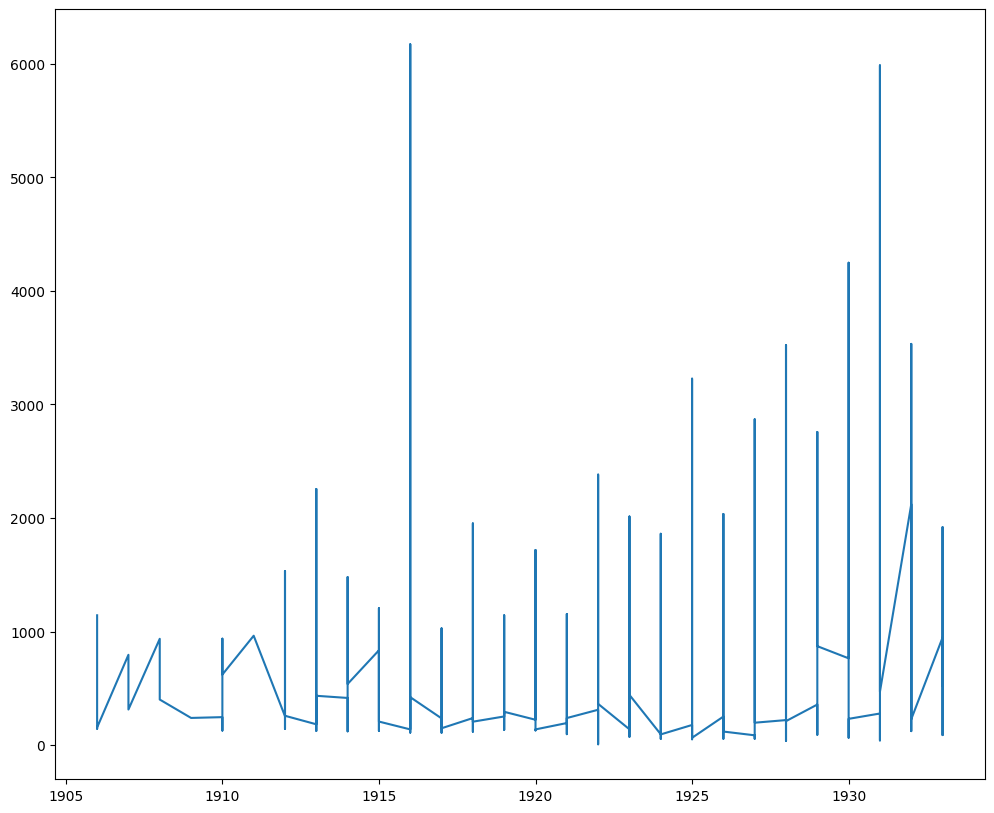

In [99]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(df['Año'], df['extension-texto'])

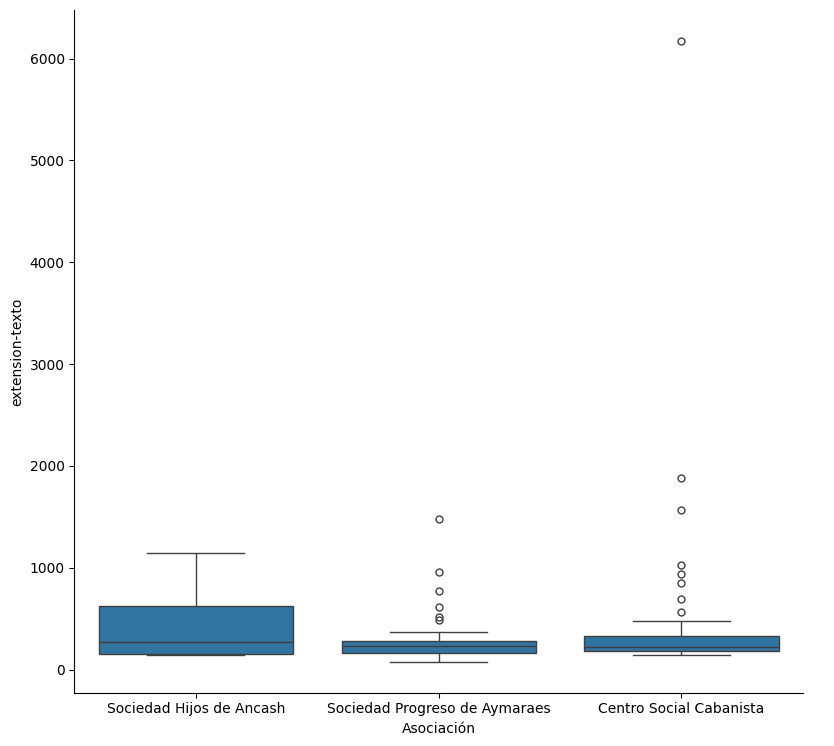

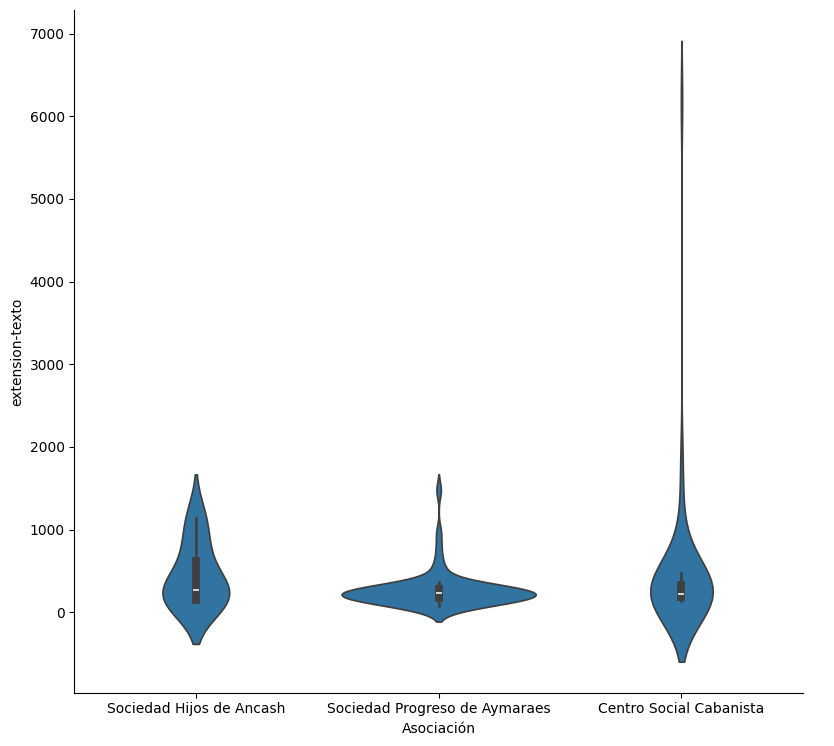

In [20]:
import seaborn as sns

where = df['Asociación'].isin(['Sociedad Progreso de Aymaraes', 'Sociedad Hijos de Ancash', 'Centro Social Cabanista'])
g = sns.catplot(data=df[where], x="Asociación", y="extension-texto", kind='box')
g.fig.set_size_inches(9, 8) ###
g.fig.set_dpi(100) ###
g = sns.catplot(data=df[where], x="Asociación", y="extension-texto", kind='violin')
g.fig.set_size_inches(9, 8) ###
g.fig.set_dpi(100) ###

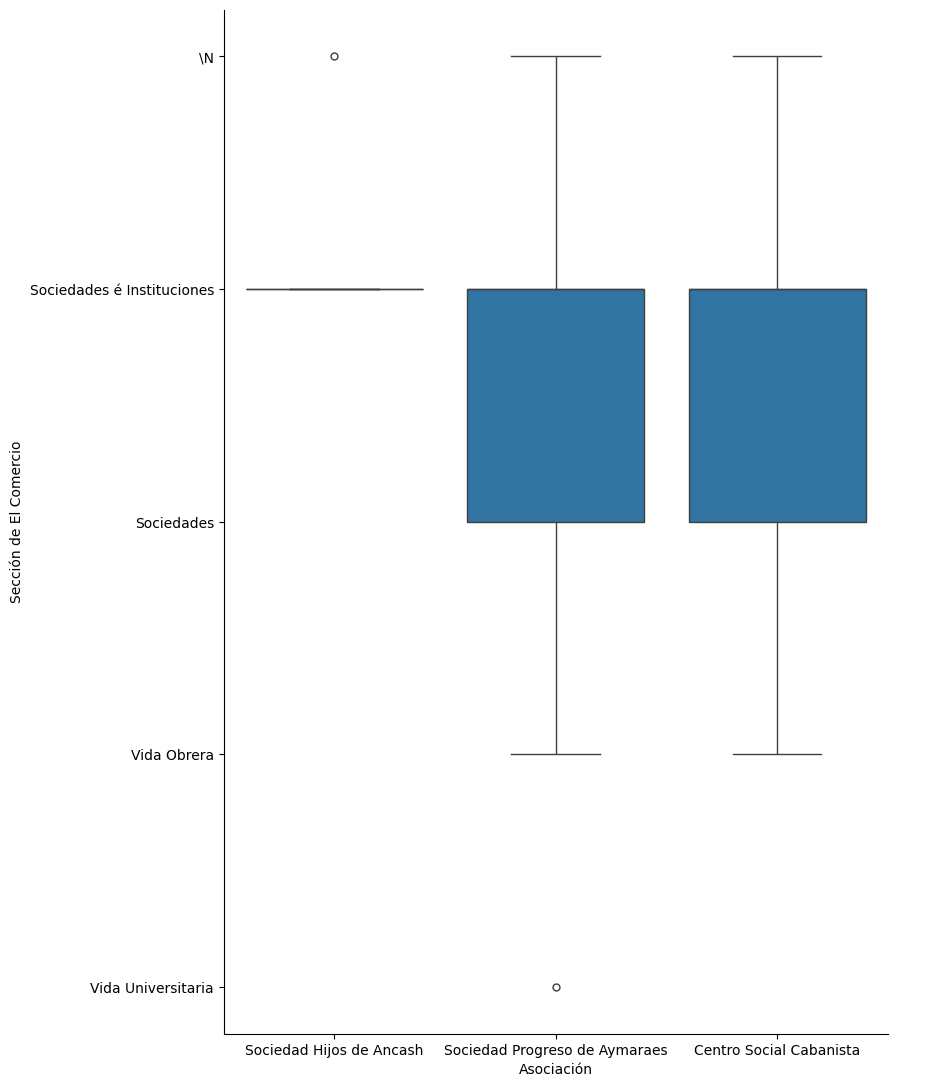

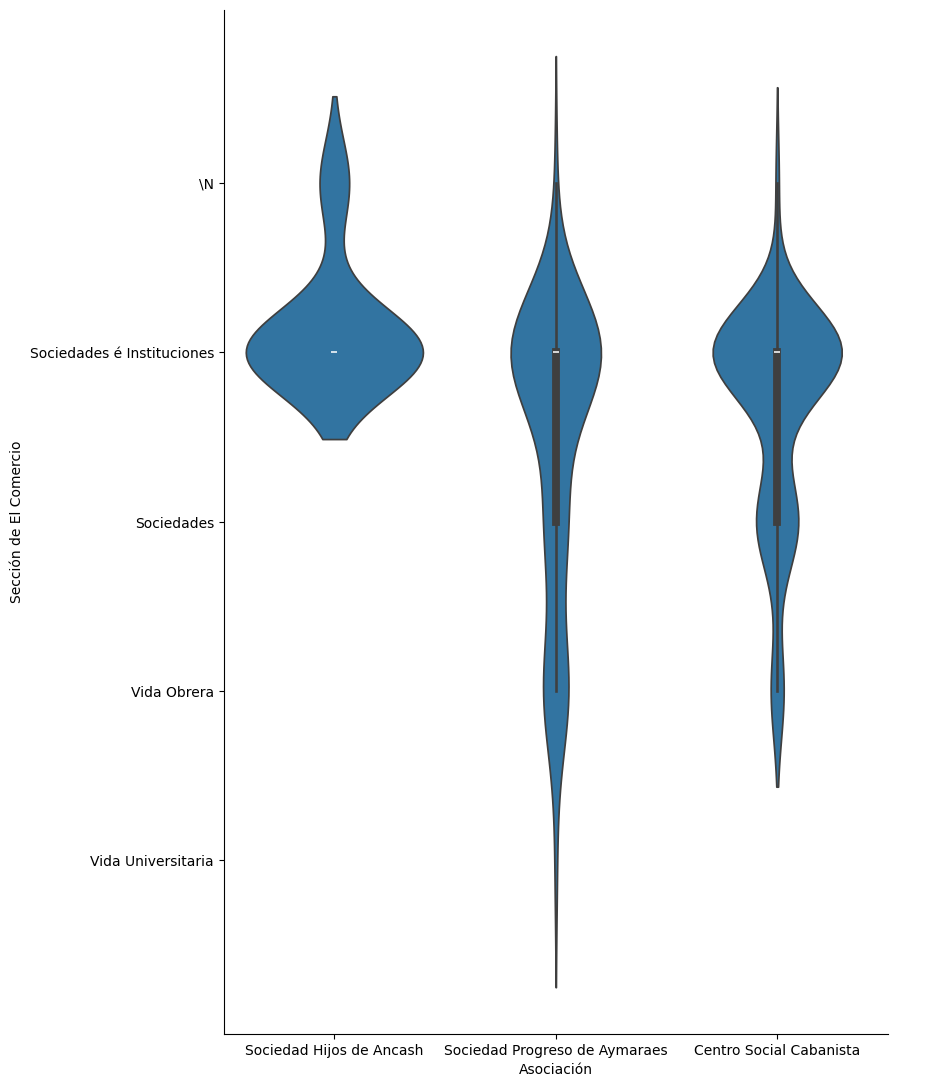

In [21]:
import seaborn as sns

where = df['Asociación'].isin(['Sociedad Progreso de Aymaraes', 'Sociedad Hijos de Ancash', 'Centro Social Cabanista'])
g = sns.catplot(data=df[where], x="Asociación", y="Sección de El Comercio", kind='box')
g.fig.set_size_inches(13, 12) ###
g.fig.set_dpi(100) ###
g = sns.catplot(data=df[where], x="Asociación", y="Sección de El Comercio", kind='violin')
g.fig.set_size_inches(13, 12) ###
g.fig.set_dpi(100) ###

<AxesSubplot: title={'center': 'Avg. Text Length'}, xlabel='Año'>

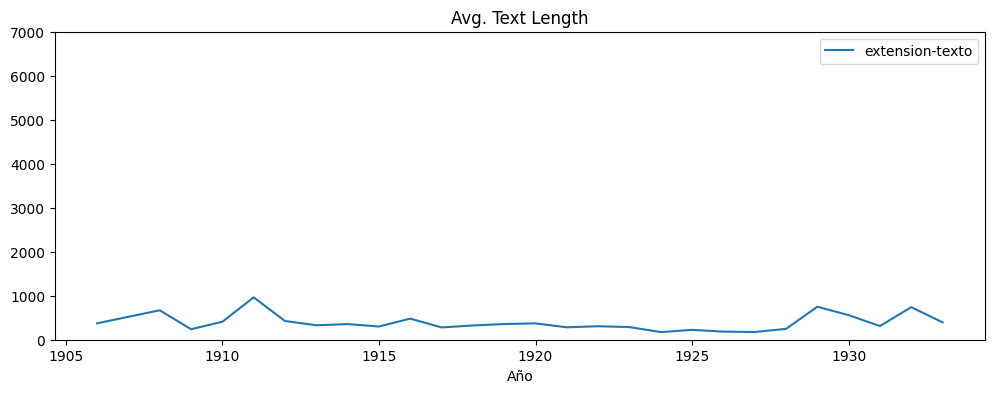

In [102]:
df.groupby('Año').agg({'extension-texto': 'mean'}) \
  .plot(title="Avg. Text Length", ylim=(0,7000), figsize=(12,4))